In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    '/content/drive/MyDrive/data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20172021.csv', 
    encoding="cp949")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
df.head(24)

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
5,미국,컴퓨터 및 주변기기,면세점 이외,2018.2/4,1553
6,미국,컴퓨터 및 주변기기,면세점 이외,2018.3/4,1784
7,미국,컴퓨터 및 주변기기,면세점 이외,2018.4/4,1773
8,미국,컴퓨터 및 주변기기,면세점 이외,2019.1/4,1298
9,미국,컴퓨터 및 주변기기,면세점 이외,2019.2/4,1408


In [4]:
df.shape

(2772, 5)

In [5]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [6]:
df.describe(include="object")

,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


In [7]:
df["판매유형별"].value_counts()

면세점 이외    2772
Name: 판매유형별, dtype: int64

# 1.

In [8]:
df_new = df.copy() # 원본 데이터 보호

df_new = df_new.rename(columns = {"데이터" : "백만"}) # 데이터 -> 백만으로 컬럼 변경
df_new["연도"] = df["시점"].map(lambda x : int(x.split('.')[0])) # 연도 변수 생성
df_new["분기"] = df["시점"].map(lambda x : int(x.split('.')[1].split('/')[0])) # 분기 변수 생성

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   백만       2772 non-null   int64 
 5   연도       2772 non-null   int64 
 6   분기       2772 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 151.7+ KB


* 백만, 연도, 분기 컬럼이 수치형 데이터이다.

In [9]:
# 기술통계 확인
df_new.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


* 알 수 있는 정보
    * 3개의 변수 모두 2772개의 값을 가지고 있으므로 결측치가 없다.
    * 2017 ~ 2022년동안 판매액이 평균 약 16억 1300만원이다.
    * 중간값이 2억9100만원이고 최대값이 476억 8900만원인걸로 봐서 최대값의 영향으로 인해 평균이 높게 나온것 같다.
    * "백만" 데이터는 표준편차도 크므로 값들의 차이가 큰 것 같다.

# 2.

In [10]:
# 국가(대륙)별 연도별 판매액의 합계 구하기
result = df_new.pivot_table(index = "국가(대륙)별", columns = "연도", values = "백만", aggfunc = "sum")
result

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


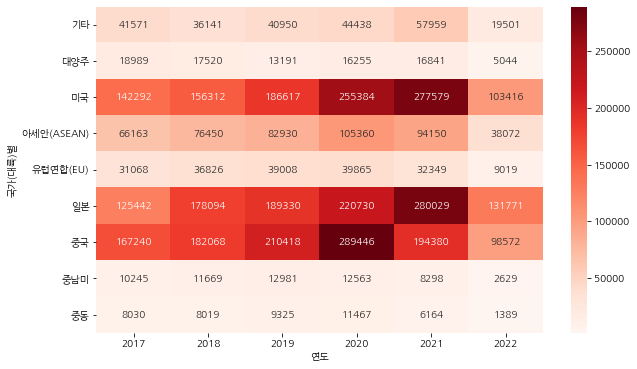

In [11]:
# 시각화
plt.figure(figsize = (10,6))
sns.heatmap(result, cmap = "Reds", annot = True, fmt = ".0f")

* 면세점을 제외한 온라인쇼핑 해외직접판매액은 2017~2022년동안 미국,일본,중국이 다른 지역에 비해 많은 부분을 차지하고 있다. 
* 그 뒤로는 아시안쪽이 차지하고 있고 나머지 지역은 비슷한 금액이다.
* 2020년 이후는 코로나 이후이기 때문에 온라인쇼핑 판매액이 2017~2019년에 비해 대체로 증가한 추세이다.
* 2020년에는 중국, 2021년에는 일본,미국이 판매액이 가장 높다.

# 3.

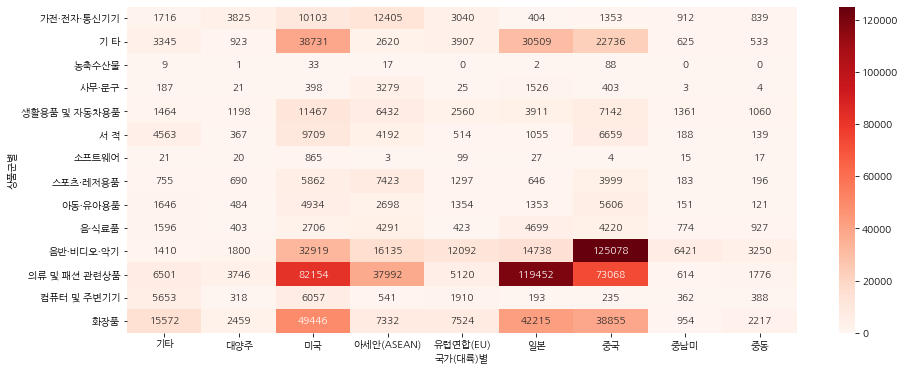

In [12]:
# 2020년 데이터 추출
df_2020 = df_new[df_new["연도"] == 2020]

# 상품군을 지역별 합계 분석
result1 = df_2020.groupby(["상품군별", "국가(대륙)별"])["백만"].sum().unstack()

# 시각화
plt.figure(figsize = (15,6))
sns.heatmap(result1, cmap = 'Reds', annot = True, fmt = ".0f")

* 기타 : **`화장품`** > **`의류 및 패션 관련상품`** > 컴퓨터 및 주변 기기
* 대양주 : 가전,전자통신기기 > **`의류 및 패션 관련상품`** > **`화장품`**
* 미국 : **`의류 및 패션 관련상품`** > **`화장품`** > 기타
* 아세안 : **`의류 및 패션 관련 상품`** > 음반,비디오,악기 > 가전, 전자통신기기
* 유럽연합 : 음반,비디오,악기 > **`화장품`** > **`의류 및 패션 관련상품`**
* 일본 : **`의류 및 패션 관련상품`** > **`화장품`** > 기타
* 중국 : 음반, 비디오, 악기 > **`의류 및 패션 관련 상품`** > **`화장품`**
* 중남미 : 음반,비디오,악기 > 생활용품 및 자동차용품 > **`화장품`**
* 중동 : 음반,비디오,악기 > **`화장품`** > 생활용품 및 자동차 용품


---
* 전 지역 top3 안에 화장품 or 의류 및 패션 관련 상품이 있는 것으로 보아 온라인 쇼핑에서 가장 많이 팔리고 있는 상품은 화장품과 의류 및 패션 관련상품이다.
* 특히 매출액이 높은 미국, 중국, 일본 역시 의류 및 패션 관련상품이 상당부분을 차지하고 있다.
* 또한 전 지역 top3안에는 있지 않지만 음반,비디오,악기 역시 높은 판매액을 기록한 것을 보아 K-POP 열풍의 영향이 있는 것을 알 수 있다.





# 4.

<Figure size 1080x432 with 0 Axes>

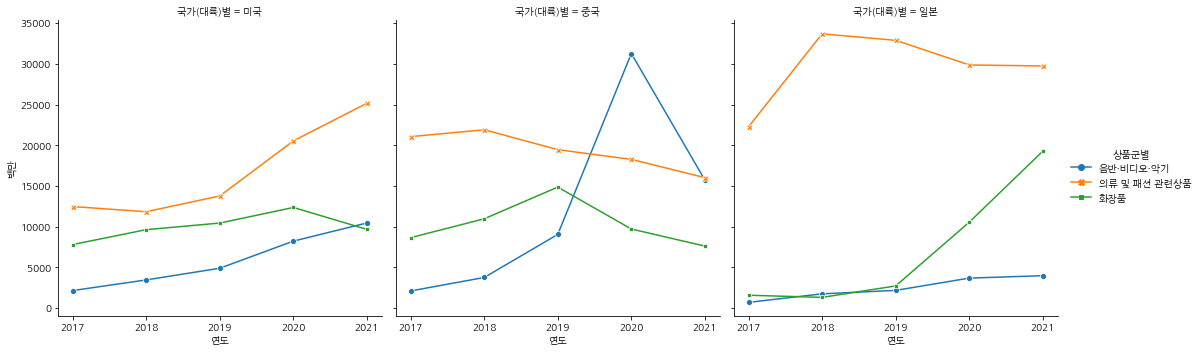

In [13]:
# 2017 ~ 2021년, 국가 : 미국/중국/일본, 상품군 : 의류 및 패션 관련상품/화장품/음반,비디오,악기 데이터 추출
df_top = df_new[(df_new["연도"] != 2022) & 
                ((df_new["국가(대륙)별"] == "미국") | (df_new["국가(대륙)별"] == "중국") | (df_new["국가(대륙)별"] == "일본")) &
                ((df_new["상품군별"] == "의류 및 패션 관련상품") | (df_new["상품군별"] == "화장품") | (df_new["상품군별"] == "음반·비디오·악기"))]

# 연도 컬럼 타입 변경
df_top = df_top.astype({"연도" : 'string'})

# 시각화
plt.figure(figsize = (15,6))
sns.relplot(data = df_top, x = "연도", y = "백만", hue = "상품군별", kind = 'line', col = "국가(대륙)별", style = "상품군별", markers = True, ci = None, dashes = False)

* 미국은 전체적으로 증가하는 추세이지만 화장품에서 2021년에 2017년과 비슷한 수준으로 감소했습니다.
* 중국은 의류 및 패션 관련상품은 감소하는 추세였지만 화장품은 전체적으로 비슷한 수준으로 변화를 보였고 음반,비디오,악기에서 2020년에 큰 판매액을 보였습니다. 
* 일본은 의류 및 패션 관련상품이 다른 상품군에 비해 압도적으로 높은 판매액을 기록하였고 화장품, 음반/비디오/악기에서도 증가하는 추세를 보였습니다.